In [1]:
print("jai shree ram")

jai shree ram


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv("dataset.csv")

In [7]:
df.head(30)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [8]:
df.shape

(6362620, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [11]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
for col in df.columns:
    print(f"Unique values for column {col}")
    print(df[col].value_counts())
    print("======================================================")

Unique values for column step
step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64
Unique values for column type
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
Unique values for column amount
amount
10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
8513.48           1
189137.90         1
1615.78           1
128891.19         1
12257.89          1
Name: count, Length: 5316900, dtype: int64
Unique values for column nameOrig
nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64
Unique values for column oldbalanceOrg
oldbalan

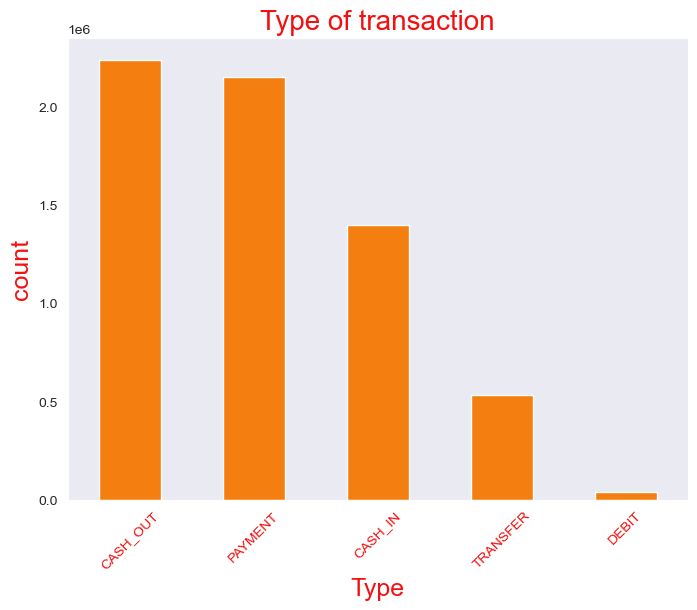

In [13]:
sns.set_style("dark") # set the style of the plot as dark grid
sns.set_palette("pastel")
plt.figure(figsize = (8,6))
df['type'].value_counts().plot(kind = 'bar', color = '#F47F10')
plt.title('Type of transaction', color = '#F41010', fontsize = 20)
plt.xticks(rotation = 45, color = '#F41010')
plt.xlabel('Type', fontsize = 18, color = '#F41010')
plt.ylabel('count', fontsize = 18, color = '#F41010')
plt.show()

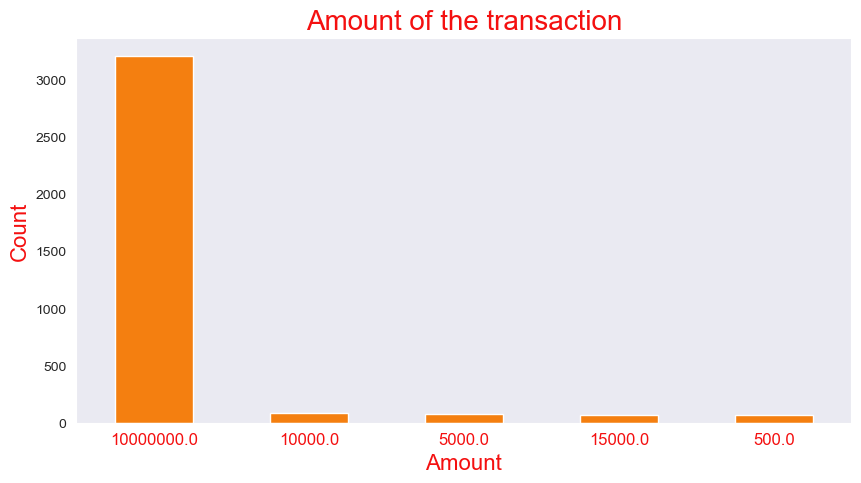

In [14]:
sns.set_style("dark") # set the style of the plot as dark grid
sns.set_palette("pastel")
plt.figure(figsize = (10,5))
df['amount'].value_counts().sort_values(ascending = False).head().plot(kind = 'bar',  color = '#F47F10')
plt.title("Amount of the transaction", fontsize = 20, color = "#F41010")
plt.xticks(rotation = 0, fontsize = 12, color = '#F41010')
plt.xlabel('Amount', fontsize = 16, color = '#F41010')
plt.ylabel('Count', fontsize = 16, color = '#F41010')
plt.show()

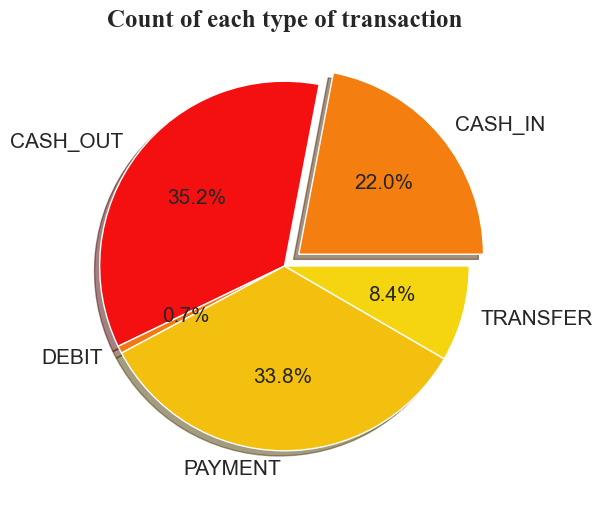

In [16]:
counts = df.groupby('type').count()['amount']
plt.figure(figsize = (6,6))
plt.pie(counts, labels = counts.index, autopct = "%1.1f%%", colors=['#F47F10', '#F41010', '#F47810', '#F4C010','#F4D510'], shadow = True,explode = (0.1, 0, 0, 0, 0),textprops={'fontsize': 15})
plt.title('Count of each type of transaction', fontweight = 'bold', fontsize = 18, fontfamily = 'times new roman')
plt.show()

In [17]:
df.groupby(['type','isFraud']).count()

step   amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
type     isFraud                                                              
CASH_IN  0        1399284  1399284   1399284        1399284         1399284   
CASH_OUT 0        2233384  2233384   2233384        2233384         2233384   
         1           4116     4116      4116           4116            4116   
DEBIT    0          41432    41432     41432          41432           41432   
PAYMENT  0        2151495  2151495   2151495        2151495         2151495   
TRANSFER 0         528812   528812    528812         528812          528812   
         1           4097     4097      4097           4097            4097   

                  nameDest  oldbalanceDest  newbalanceDest  isFlaggedFraud  
type     isFraud                                                            
CASH_IN  0         1399284         1399284         1399284         1399284  
CASH_OUT 0         2233384         2233384         2233384         2233384  
         1            4116            4116            4116            4116  
DEBIT    0           41432           41432           41432           41432  
PAYMENT  0         2151495         2151495         2151495         2151495  
TRANSFER 0          528812          528812          528812          528812  
         1            4097            4097            4097            4097

In [18]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
numeric_data = df[numeric_columns]

# pearson corrleation matrix of the numerical data
correlation = numeric_data.corr()

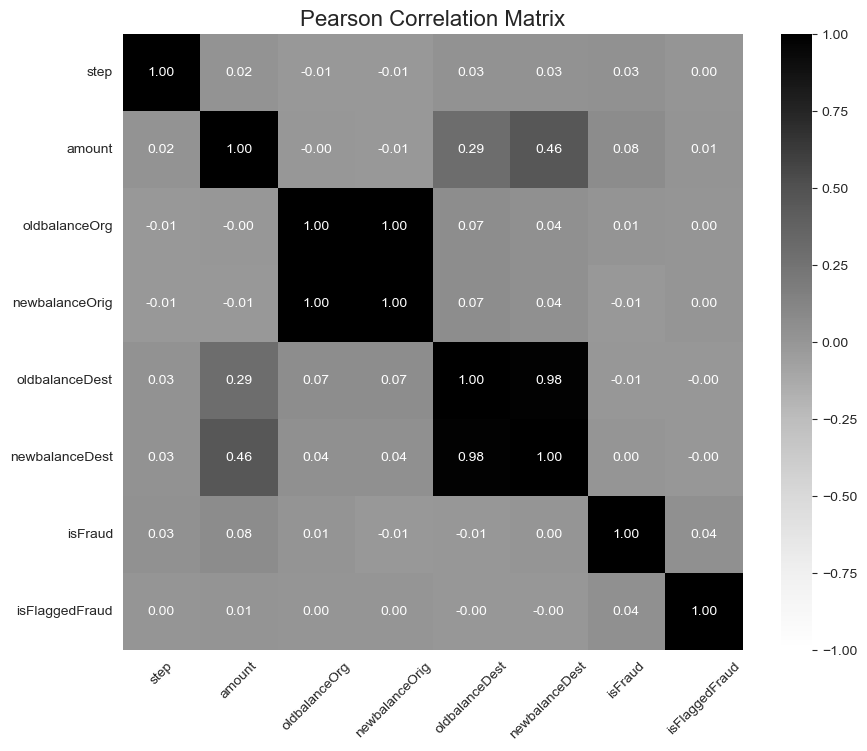

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation,vmin = -1, vmax = 1,cmap = "Greys",annot = True, fmt = '.2f')
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.xticks(rotation = 45)
plt.show()

In [24]:
# nameDest and nameOrig can also be removed
df.drop(['nameOrig', 'nameDest'], axis = 1, inplace = True)

In [28]:
df.head()

,step,type,amount,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,0,0
1,1,PAYMENT,1864.28,0,0
2,1,TRANSFER,181.00,1,0
3,1,CASH_OUT,181.00,1,0
4,1,PAYMENT,11668.14,0,0


In [29]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [30]:
X = df.drop('isFraud', axis = 1)
y = df['isFraud']

In [31]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [34]:
lr = LogisticRegression()

#fitting the trainig data into lr model
lr.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = lr.predict(X_test)

In [36]:
# calculating the performance matrix

#accuracy of the logistic regression
accuracy_lr = accuracy_score(y_test, y_pred)

# precision of the logistic regression
precision_lr = precision_score(y_test, y_pred)

# recall of the logistic regression
recall_lr = recall_score(y_test, y_pred)

# classification report
classification_lr = classification_report(y_test, y_pred)

# print the performance matrix
print(f"Accuracy of logistic regression {accuracy_lr}")
print(f"Precision of logistic regression {precision_lr}")
print(f"Recall of logistic regression {recall_lr}")
print(f"Classification Report of logistic regression\n {classification_lr}")

Accuracy of logistic regression 0.9987086032693031
Precision of logistic regression 0.1590909090909091
Recall of logistic regression 0.002874743326488706
Classification Report of logistic regression
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.16      0.00      0.01      2435

    accuracy                           1.00   1908786
   macro avg       0.58      0.50      0.50   1908786
weighted avg       1.00      1.00      1.00   1908786



In [37]:
sv = DecisionTreeClassifier(max_depth = 20)

#fitting the trainig data into lr model
sv.fit(X_train, y_train)

# testing the model on test data
y_pred = sv.predict(X_test)

In [38]:
# calculating the performance matrix

#accuracy of the logistic regression
accuracy_sv = accuracy_score(y_test, y_pred)

# precision of the logistic regression
precision_sv = precision_score(y_test, y_pred)

# recall of the logistic regression
recall_sv = recall_score(y_test, y_pred)

# classification report
classification_sv = classification_report(y_test, y_pred)

# print the performance matrix
print(f"Accuracy of Decision Tree {accuracy_sv}")
print(f"Precision of Decision Tree {precision_sv}")
print(f"Recall of Decision Tree {recall_sv}")
print(f"Classification Report of Decision Tree\n {classification_sv}")

Accuracy of Decision Tree 0.998975264906595
Precision of Decision Tree 0.6625933469110659
Recall of Decision Tree 0.40082135523613965
Classification Report of Decision Tree
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.66      0.40      0.50      2435

    accuracy                           1.00   1908786
   macro avg       0.83      0.70      0.75   1908786
weighted avg       1.00      1.00      1.00   1908786



In [39]:
mlp = MLPClassifier(hidden_layer_sizes= 10, batch_size= 32, learning_rate= 'adaptive', learning_rate_init=0.001)
mlp.fit(X_train, y_train)

MLPClassifier(batch_size=32, hidden_layer_sizes=10, learning_rate='adaptive')

In [40]:
y_pred = mlp.predict(X_test)

In [41]:
# calculating the performance matrix

#accuracy of the logistic regression
accuracy_mlp = accuracy_score(y_test, y_pred)

# precision of the logistic regression
precision_mlp = precision_score(y_test, y_pred)

# recall of the logistic regression
recall_mlp = recall_score(y_test, y_pred)

# classification report
classification_mlp = classification_report(y_test, y_pred)

# print the performance matrix
print(f"Accuracy of MLP Classifier {accuracy_mlp}")
print(f"Precision of MLP Classifier {precision_mlp}")
print(f"Recall of MLP Classifier {recall_mlp}")
print(f"Classification Report of MLP Classifier\n {classification_mlp}")

Accuracy of MLP Classifier 0.9988956331406454
Precision of MLP Classifier 0.8516129032258064
Recall of MLP Classifier 0.1626283367556468
Classification Report of MLP Classifier
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.85      0.16      0.27      2435

    accuracy                           1.00   1908786
   macro avg       0.93      0.58      0.64   1908786
weighted avg       1.00      1.00      1.00   1908786



In [42]:
performance_df = pd.DataFrame({
    'models' : ['Multi Layer Perceptron', 'Logistic Regression', 'Decision Tree'],
    'accuracy' : [accuracy_mlp, accuracy_lr, accuracy_sv],
    'precision' : [precision_mlp, precision_lr, precision_sv],
    'recall' : [recall_mlp, recall_lr, recall_sv]
})
performance_df

,models,accuracy,precision,recall
0,Multi Layer Perceptron,0.998896,0.851613,0.162628
1,Logistic Regression,0.998709,0.159091,0.002875
2,Decision Tree,0.998975,0.662593,0.400821


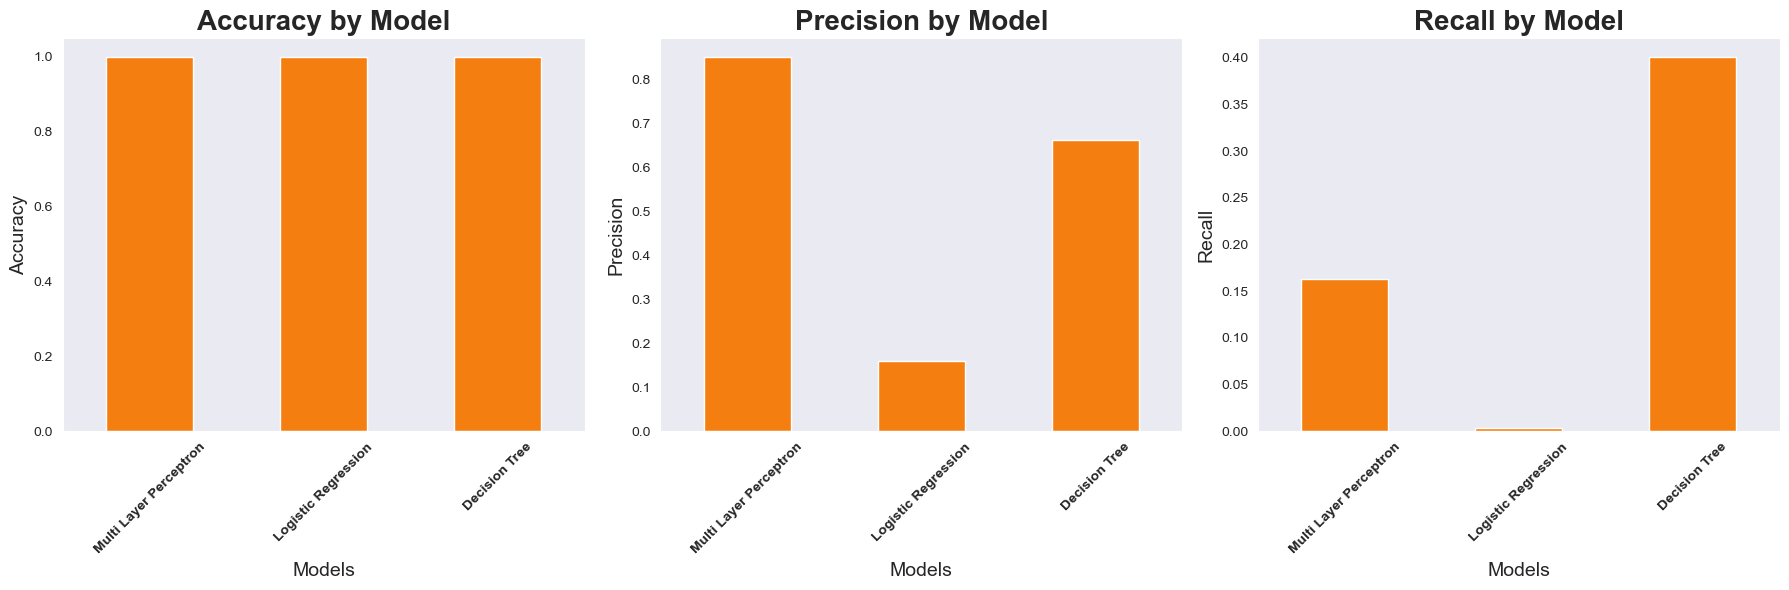

In [44]:
# Create a figure and multiple axis objects
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

metrics = ['accuracy', 'precision', 'recall']

for i, metric in enumerate(metrics):
    performance_df[metric].plot(kind='bar', ax=ax[i], color = '#F47F10')
    
    # Set the tick labels and rotation
    ax[i].set_xticklabels(performance_df['models'], rotation=45, fontweight = 'bold')
    
    # Adding labels
    ax[i].set_xlabel('Models', fontsize = 14)
    ax[i].set_ylabel(metric.capitalize(), fontsize = 14)  # Use the metric name as ylabel
    ax[i].set_title(f'{metric.capitalize()} by Model', fontsize = 20, fontweight = 'bold')  # Set dynamic title

plt.tight_layout()
plt.show()